In [1]:
# Libraries import
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle

In [2]:
#Dataset load
datafile = pd.read_csv("marriage.csv")

In [3]:
df = datafile.copy()

In [4]:
# Datafile exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2567 non-null   int64  
 1   gender           2538 non-null   object 
 2   height           2449 non-null   object 
 3   religion         1932 non-null   object 
 4   caste            2425 non-null   object 
 5   mother_tongue    2403 non-null   object 
 6   profession       2237 non-null   object 
 7   location         2412 non-null   object 
 8   country          2551 non-null   object 
 9   age_of_marriage  2548 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 200.7+ KB


In [5]:
df.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [6]:
df.describe()

,id,age_of_marriage
count,2567.000000,2548.000000
mean,1284.000000,29.648352
std,741.173394,2.802414
min,1.000000,20.000000
25%,642.500000,28.000000
50%,1284.000000,30.000000
75%,1925.500000,32.000000
max,2567.000000,36.000000


In [7]:
df.head(5)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


## Exploratory Data Analysis

In [8]:
# Gender: Lets drop the na value rows since imputating them is not a good idea.
df.dropna(subset = ['gender'], inplace = True)

In [9]:
# Height: First change the value type and convert it into integer and then do imputation.
df['height'] = df['height'].astype(str)
df['height'] = df['height'].apply(lambda x: x.replace("'",'.'))
df['height'] = df['height'].apply(lambda x: x.replace('"' ,''))
df['height'] = df['height'].astype(float)

In [10]:
df['height'].fillna(df.height.median(),inplace=True)

In [11]:
# Religion
df.religion.value_counts()

Hindu        1576
Sikh          150
Christian     120
Jain           46
Muslim         40
Name: religion, dtype: int64

In [12]:
df['religion'].fillna("Hindu", inplace = True)

In [13]:
# Caste
df.caste.value_counts()

others                   464
 Brahmin                 252
 Kshatriya                70
 Lingayath                65
 Agarwal                  53
 Shwetamber               46
 Patel                    42
 Baniya                   41
 Bhandari                 41
 Arora                    41
 Vaishnav                 41
 Khatri                   40
 Scheduled Caste (SC)     40
 Thakur                   40
 Ramdasia                 40
 Valmiki                  40
 OBC - Barber/Naayee      40
 Sindhi-Sakkhar           40
 Goud                     40
 Balija                   40
 Kayastha                 40
 Gursikh                  40
 Arya Vysya               40
 Viswabrahmin             40
 Baidya                   40
 Kaibarta                 40
 Baishnab                 40
 Bhatia                   40
 Billava                  40
 Vanniyar                 40
 Agri                     40
 Marthoma                 40
 Ahom                     40
 Roman Catholic           40
 Rajput - Lodh

In [14]:
df['caste'].fillna("others", inplace = True)

In [15]:
#mother_tongue 
df.mother_tongue.value_counts()

Hindi           494
Telugu          283
Bengali         242
Punjabi         233
Marathi         213
Gujarati        184
Kannada         156
Tamil           111
Assamese        107
Malayalam        92
Odia             64
Sindhi           58
Marwari          30
Tulu             29
English          24
Konkani          22
Urdu              7
Chattisgarhi      5
Kutchi            4
Bhojpuri          4
Haryanavi         4
Other             2
Manipuri          2
Nepali            1
Rajasthani        1
Aka               1
Kashmiri          1
Name: mother_tongue, dtype: int64

In [16]:
df.dropna(subset = ['mother_tongue'], inplace = True)

In [17]:
# profession
df.profession.value_counts()

Not Specified                     260
Not working                       252
Banking Professional              107
Software Professional             104
Software Professional (Others)     81
                                 ... 
Hairstylist                         1
Indian Police Services [IPS]        1
Journalist                          1
IAS / IRS / IES / IFS               1
Pilot / Co-Pilot                    1
Name: profession, Length: 86, dtype: int64

In [18]:
df.dropna(subset = ['profession'], inplace = True)

In [19]:
#location
df.location.value_counts()

Mumbai                   184
Bengaluru / Bangalore    151
Delhi                    134
Pune                      85
Hyderabad                 76
                        ... 
Tezu                       1
Hoovina Hadagalli          1
Kasaragod                  1
Enfield                    1
Ottawa                     1
Name: location, Length: 489, dtype: int64

In [20]:
df['location'].fillna("Mumbai", inplace = True)

In [21]:
# age of marriage
df.age_of_marriage.describe()
df['age_of_marriage'].fillna(df.age_of_marriage.median(),inplace=True)

In [22]:
#Dropping of the id column
df.drop('id',inplace=True,axis=1)

In [23]:
# Renaming of the age of marriage column
df.rename(columns={"age_of_marriage": "age"}, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 1 to 2566
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         2180 non-null   object 
 1   height         2180 non-null   float64
 2   religion       2180 non-null   object 
 3   caste          2180 non-null   object 
 4   mother_tongue  2180 non-null   object 
 5   profession     2180 non-null   object 
 6   location       2180 non-null   object 
 7   country        2180 non-null   object 
 8   age            2180 non-null   float64
dtypes: float64(2), object(7)
memory usage: 170.3+ KB


In [25]:
df.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age
1,male,5.7,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,male,5.7,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,female,5.0,Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,male,5.5,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,male,5.5,Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


### Visualisation

male      1129
female    1051
Name: gender, dtype: int64


F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


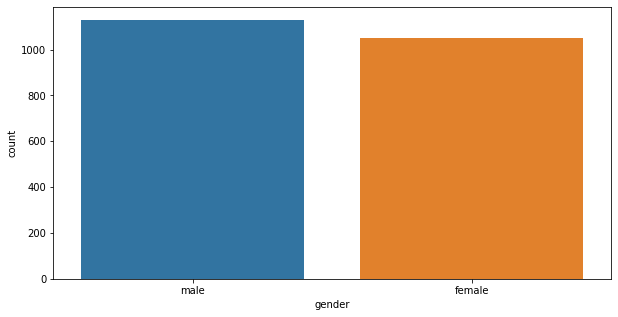

In [26]:
# gender
plt.figure(figsize=(10,5))
print(df.gender.value_counts())
sns.countplot(df.gender)
plt.show()
warnings.filterwarnings('ignore')

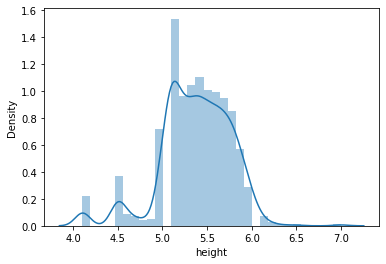

In [27]:
#height
sns.distplot(df.height)
plt.show()

Hindu        1824
Sikh          150
Christian     120
Jain           46
Muslim         40
Name: religion, dtype: int64


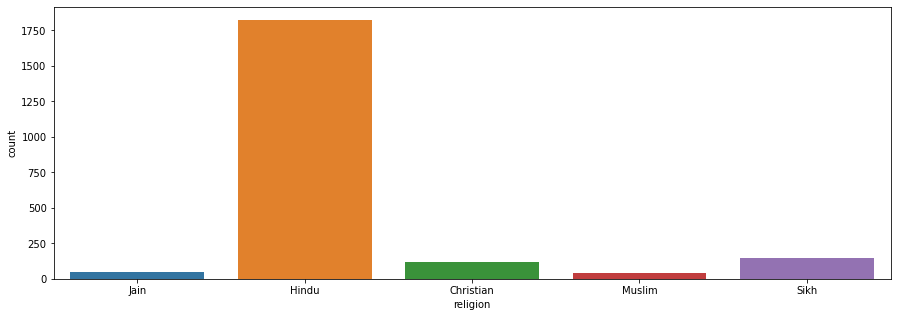

In [28]:
#religion
plt.figure(figsize=(15,5))
print(df.religion.value_counts())
sns.countplot(df.religion)
plt.show()

 Brahmin                 252
others                   248
 Kshatriya                70
 Lingayath                65
 Agarwal                  53
 Shwetamber               46
 Patel                    42
 Baniya                   41
 Bhandari                 41
 Arora                    41
 Vaishnav                 41
 OBC - Barber/Naayee      40
 Scheduled Caste (SC)     40
 Thakur                   40
 Ramdasia                 40
 Khatri                   40
 Bhatia                   40
 Sindhi-Sakkhar           40
 Goud                     40
 Balija                   40
 Kayastha                 40
 Gursikh                  40
 Arya Vysya               40
 Viswabrahmin             40
 Kaibarta                 40
 Billava                  40
 Roman Catholic           40
 Rajput - Lodhi           40
 Vanniyar                 40
 Agri                     40
 Marthoma                 40
 Ahom                     40
 Baishnab                 40
 Valmiki                  40
 Baidya       

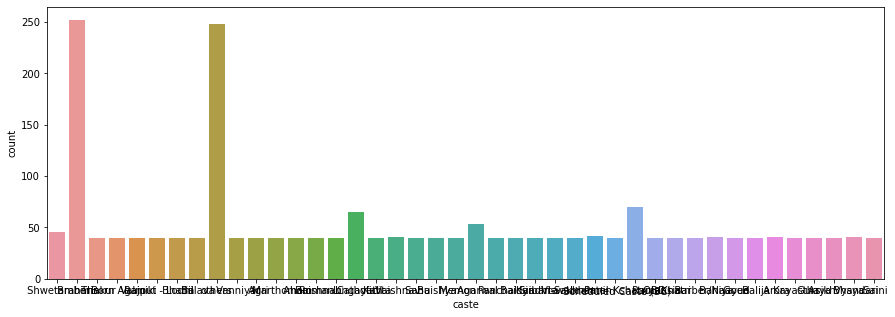

In [29]:
#caste
plt.figure(figsize=(15,5))
print(df.caste.value_counts())
sns.countplot(df.caste)
plt.show()

Hindi           462
Bengali         241
Punjabi         232
Telugu          208
Marathi         203
Gujarati        183
Kannada         132
Assamese        107
Tamil            93
Malayalam        83
Odia             63
Sindhi           44
Marwari          27
English          24
Tulu             24
Konkani          22
Urdu              7
Chattisgarhi      5
Kutchi            4
Bhojpuri          4
Haryanavi         4
Other             2
Manipuri          2
Nepali            1
Rajasthani        1
Aka               1
Kashmiri          1
Name: mother_tongue, dtype: int64


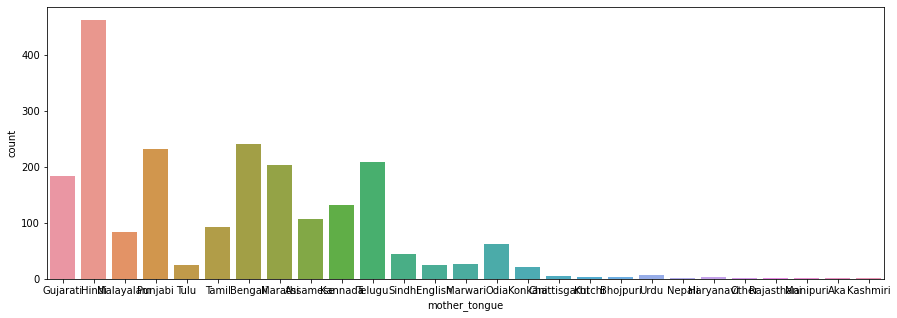

In [30]:
#mother_tongue
plt.figure(figsize=(15,5))
print(df.mother_tongue.value_counts())
sns.countplot(df.mother_tongue)
plt.show()

 India                   1912
 USA                      122
 Canada                    35
 United Arab Emirates      27
 United Kingdom            21
 Australia                 19
 New Zealand                6
 Malaysia                   6
 Kuwait                     5
 Bangladesh                 4
 Pakistan                   4
 Singapore                  3
 Qatar                      2
 Netherlands                2
 Oman                       2
 Germany                    2
 Myanmar                    1
 Denmark                    1
 Bahrain                    1
 Ireland                    1
 Armenia                    1
 Philippines                1
 Norway                     1
 South Africa               1
Name: country, dtype: int64


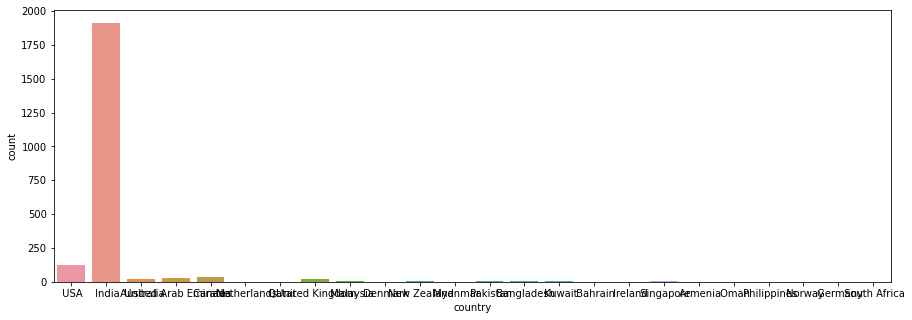

In [31]:
#country
plt.figure(figsize=(15,5))
print(df.country.value_counts())
sns.countplot(df.country)
plt.show()

### Pre-model data preparations

In [32]:
# Depedent and independent variable split
y = df['age']
x =df.drop(columns = ['age'])

In [33]:
x.drop(["profession","location"],axis = 1, inplace = True)

In [34]:
x

,gender,height,religion,caste,mother_tongue,country
1,male,5.70,Jain,Shwetamber,Gujarati,USA
2,male,5.70,Hindu,Brahmin,Hindi,India
3,female,5.00,Hindu,Thakur,Hindi,India
4,male,5.50,Christian,Born Again,Malayalam,India
5,male,5.50,Hindu,Valmiki,Hindi,India
...,...,...,...,...,...,...
2562,female,5.30,Hindu,Thakur,Hindi,India
2563,male,5.11,Hindu,Thakur,Hindi,Canada
2564,female,5.30,Hindu,Baishya,Bengali,India
2565,female,4.11,Hindu,others,Telugu,India


In [35]:
# Label encoding
le = LabelEncoder()
x.loc[:,['gender','religion','caste','mother_tongue','country']]= \
x.loc[:,['gender','religion','caste','mother_tongue','country']].apply(le.fit_transform)

In [36]:
# To check for multicollinearity
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

         feature        VIF
0         gender   2.196108
1         height  13.646521
2       religion   3.117402
3          caste   3.963565
4  mother_tongue   3.702692
5        country   5.019481


In [37]:
# Scaling
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [38]:
# VIF check after scaling
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.162474,gender
1,1.174680,height
2,1.041010,religion
3,1.003514,caste
4,1.042672,mother_tongue
5,1.009027,country


In [39]:
# Train test dataset split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 101)

## Model Building

### Linear Regression

In [40]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

print(f"Model score on train data: {round(model_lr.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(model_lr.score(x_test, y_test),2)}")

Model score on train data: 0.1
Model score on test data: 0.09


### Regularisation

In [41]:
#Lets try regularising our linear model to reduce overfitting

## LASSO regularisation
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [42]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0004412386451505053

In [43]:
lasso_model = Lasso(alpha)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.0004412386451505053, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
print(f"Model score on train data: {round(lasso_model.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(lasso_model.score(x_test, y_test),2)}")

Model score on train data: 0.1
Model score on test data: 0.09


In [45]:
## RIDGE Regularisation
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([6.55222091, 7.01173675, 9.06306684, 2.16094125, 6.1308554 ,
       1.55163336, 2.63892216, 9.97581266, 0.74073441, 5.21154105,
       2.37588826, 5.94602331, 6.76544991, 9.46596753, 2.37446508,
       0.98834565, 4.00599611, 5.73388024, 7.51123428, 6.3337431 ,
       9.38462337, 1.85319345, 9.56228816, 4.21220259, 9.23211638,
       5.16236421, 9.50713814, 3.95664485, 5.22413641, 1.69131296,
       6.9708951 , 5.653999  , 4.36465847, 3.72305482, 4.48117944,
       4.76183797, 6.88027015, 3.81249717, 1.08011285, 3.80407849,
       2.28706682, 9.72397816, 9.56027317, 9.63267468, 8.51851678,
       6.0288588 , 7.37181816, 9.66861408, 9.20696864, 8.48726328]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [46]:
# best alpha parameter
alpha = ridgecv.alpha_
alpha

0.740734406756115

In [47]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.740734406756115, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
print(f"Model score on train data: {round(ridge_model.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(ridge_model.score(x_test, y_test),2)}")

Model score on train data: 0.1
Model score on test data: 0.09


In [49]:
# ELASTIC NET Regularisation
elasticcv = ElasticNetCV(alphas = None, cv =10)
elasticcv.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [50]:
alpha = elasticcv.alpha_
alpha

0.028959330640397202

In [51]:
elasticcv.l1_ratio

0.5

In [52]:
elasticnet_model = ElasticNet(alpha = elasticcv.alpha_,l1_ratio=0.5)
elasticnet_model.fit(x_train, y_train)

ElasticNet(alpha=0.028959330640397202, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [53]:
print(f"Model score on train data: {round(elasticnet_model.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(elasticnet_model.score(x_test, y_test),2)}")

Model score on train data: 0.1
Model score on test data: 0.09


In [54]:
# Thus regularisation gives no improvement in model score.Lets try other models.

### Support Vector Regressor

In [55]:
model_svr = SVR()
model_svr.fit(x_train, y_train)

print(f"Model score on train data: {round(model_svr.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(model_svr.score(x_test, y_test),2)}")

Model score on train data: 0.22
Model score on test data: 0.2


### K Nearest Neighbour

In [56]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)

print(f"Model score on train data: {round(model_knn.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(model_knn.score(x_test, y_test),2)}")

Model score on train data: 0.5
Model score on test data: 0.17


### Decision Tree


In [57]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)

print(f"Model score on train data: {round(model_dt.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(model_dt.score(x_test, y_test),2)}")

Model score on train data: 0.84
Model score on test data: 0.26


### Random Forest

In [58]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

print(f"Model score on train data: {round(model_rf.score(x_train, y_train),2)}")
print(f"Model score on test data: {round(model_rf.score(x_test, y_test),2)}")

Model score on train data: 0.8
Model score on test data: 0.45


In [59]:
# Thus for this usecase, linear regression seems to give us the highets score of 90% on out test datatset.

In [60]:
# Best model saving
pickle.dump(model_lr, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))